In [2]:
import numpy as np

np.random.seed(42)

m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

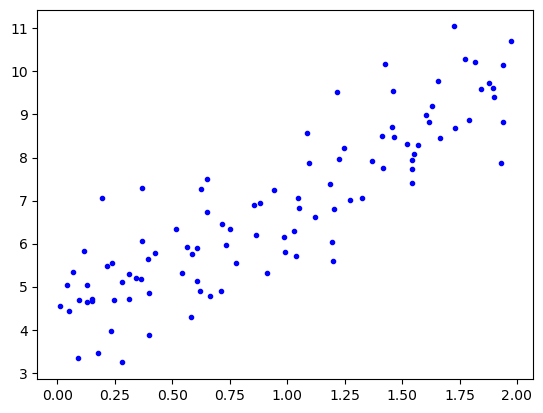

In [3]:
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")

In [4]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [6]:
X_new = np.array([[0], [2]])

In [7]:
X_new_b = add_dummy_feature(X_new)

In [8]:
y_predict = X_new_b @ theta_best

In [9]:
y_predict

array([[4.21509616],
       [9.75532293]])

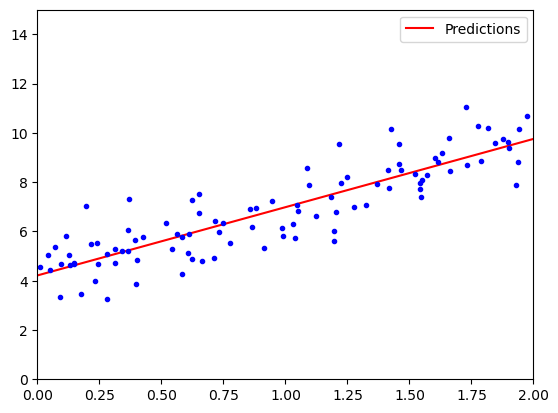

In [10]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [12]:
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [13]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [14]:
# Batch Gradient Descent
eta = 0.1  # learning rate

In [16]:
n_epochs = 1000

In [17]:
m = len(X_b)

In [18]:
theta_gradient_descent = np.random.randn(2, 1) # random initialization model parameters

In [19]:
X_b

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728],
       [1.        , 0.31198904],
       [1.        , 0.11616722],
       [1.        , 1.73235229],
       [1.        , 1.20223002],
       [1.        , 1.41614516],
       [1.        , 0.04116899],
       [1.        , 1.9398197 ],
       [1.        , 1.66488528],
       [1.        , 0.42467822],
       [1.        , 0.36364993],
       [1.        , 0.36680902],
       [1.        , 0.60848449],
       [1.        , 1.04951286],
       [1.        , 0.86389004],
       [1.        , 0.58245828],
       [1.        , 1.22370579],
       [1.        , 0.27898772],
       [1.        , 0.5842893 ],
       [1.        , 0.73272369],
       [1.        , 0.91213997],
       [1.        , 1.57035192],
       [1.        , 0.39934756],
       [1.        , 1.02846888],
       [1.        , 1.18482914],
       [1.        , 0.09290083],
       [1.

In [20]:
for epoch in range(n_epochs):
    gradients = 2/m * X_b.T @ (X_b @ theta_gradient_descent - y)
    theta_gradient_descent = theta_gradient_descent - eta * gradients

In [21]:
theta_gradient_descent

array([[4.21509616],
       [2.77011339]])

In [23]:
X_b @ theta_gradient_descent

array([[6.29013335],
       [9.48226901],
       [8.27050859],
       [7.53179992],
       [5.07947481],
       [5.07934118],
       [4.53689254],
       [9.01390843],
       [7.54540964],
       [8.13797881],
       [4.32913892],
       [9.58861669],
       [8.82701716],
       [5.39150298],
       [5.22244771],
       [5.23119873],
       [5.90066718],
       [7.12236579],
       [6.60816951],
       [5.82857164],
       [7.60489995],
       [4.98792378],
       [5.83364376],
       [6.24482385],
       [6.74182729],
       [8.56514904],
       [5.32133419],
       [7.06407156],
       [7.49720721],
       [4.47244198],
       [7.58103241],
       [5.15983847],
       [4.57549673],
       [9.47213722],
       [9.5649166 ],
       [8.69380079],
       [5.90272552],
       [4.75622182],
       [8.00590229],
       [6.65364079],
       [4.89121565],
       [6.95848853],
       [4.40561636],
       [9.25293739],
       [5.64879594],
       [7.88561985],
       [5.94204621],
       [7.096

In [24]:
# Stochastic Gradient Descent
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

In [25]:
def learning_schedule(t):
    return t0 / (t + t1)

In [26]:
theta_sgd = np.random.randn(2, 1)  # random initialization

In [27]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T @ (xi @ theta_sgd - yi)
        eta = learning_schedule(epoch * m + i)
        theta_sgd = theta_sgd - eta * gradients

In [28]:
theta_sgd

array([[4.18475289],
       [2.73036719]])